# TODO:

 - Use container for datasets and models
 - rifare tutto con msn
 - no_relevant_results
 - ">" =1 spiegat istanza la metrica
 - aggiungere linee orizzontali al bar
 - salvo check width barre
 - solo 3 cifre decimali, orizzontali o niente

# Effectiveness analysis 
It comprises multiple performance tests.

Following steps:
    1. Load models and test datasets 
    2. Create metrics
    3. Effectiveness analysis:
        - Model performance
        - Tree-wise performance
        - Tree-Wise average Contribution
        - Query-wise performance
        - Query class performance
        - Document graded-relevance performance
        - Rank confusion matrix
        

#### Essential imports

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt

import os
import numpy as np
import pandas as pd
import xarray as xr

# Useful to reload the module without having to restart the notebook kernel
import rankeval.analysis.effectiveness
import rankeval.visualization.effectiveness
import rankeval.metrics

#### Data file setup

In [18]:
# Dataset files
istella_train_file = "/home/rankeval/rankeval_data/istella-letor/dataset/full/train.txt"
istella_test_file = "/home/rankeval/rankeval_data/istella-letor/dataset/full/test.txt"

# Model files
quickrank_istella_lmart_1Ktrees_file = "/home/rankeval/rankeval_data/istella-letor/models/lambdamart/tiscali.quickrank.LAMBDAMART.20000.32.T1000.xml"
quickrank_istella_lmart_5Ktrees_file = "/home/rankeval/rankeval_data/istella-letor/models/lambdamart/tiscali.quickrank.LAMBDAMART.20000.32.T5000.xml"
quickrank_istella_oblv_lmart_1Ktrees_file = "/home/rankeval/rankeval_data/istella-letor/models/oblivious-lambdamart/tiscali.quickrank.OBVLAMBDAMART.20000.5.T1000.xml"

# Loading models, datasets from file

In [19]:
# Loading Models
from rankeval.model import RTEnsemble

istella_lmart_1Ktrees = RTEnsemble(quickrank_istella_lmart_1Ktrees_file, name="L-Mart-1K", format="QuickRank")
istella_lmart_5Ktrees = RTEnsemble(quickrank_istella_lmart_5Ktrees_file, name="L-Mart-5K", format="QuickRank")
istella_obl_lmart_1Ktrees = RTEnsemble(quickrank_istella_oblv_lmart_1Ktrees_file, name="Obl-1K", format="QuickRank")

#msn_mart_50 = RTEnsemble(model_file_50, name="MART-50", format="QuickRank")
#msn_lmart_100 = RTEnsemble(model_file_100, name="MART-100", format="QuickRank")
#istella_lmart_500 = RTEnsemble(model_file_500, name="LMART-500", format="QuickRank")

In [21]:
# Loading Datasets
from rankeval.dataset import Dataset

#istella
#uncomment below
#istella_train = Dataset.load(istella_train_file, name="Istella-Train", format="svmlight")
istella_test = Dataset.load(istella_test_file, name="Istella-Test", format="svmlight")

#msn
#msn_train = Dataset.load(data_file_msn_train, name="MSN Train", format="svmlight")
#msn_validation = Dataset.load(data_file_msn_valid, name="MSN Valid", format="svmlight")
#msn_test = Dataset.load(data_file_msn_test, name="MSN Test", format="svmlight")

### Create metrics 

metrics, no_relevant_results, esempi citazione a lightGBM Yahoo challenge ...

In [22]:
from rankeval.metrics import Precision, Recall, NDCG

precision_10 = Precision(cutoff=10)
recall_10 = Recall(cutoff=10)
ndcg_10 = NDCG(cutoff=10, no_relevant_results=0.5, implementation='exp')

# Effectiveness analysis
Evaluate the effectiveness of a set of models over several datasets and using a set of metrics

##  1. Model performance

- Compute the model performance analysis
- Display results
- Plot results

#### -> Computes the model performance analysis

In [27]:
%timeit -r 1 -n 1
from rankeval.analysis.effectiveness import model_performance

# Istella
# check performance of this !!!!
istella_model_perf = model_performance(datasets=[istella_test], 
                           models=[istella_lmart_1Ktrees, istella_lmart_5Ktrees], 
                           metrics=[precision_10, recall_10, ndcg_10])
istella_model_perf.to_dataframe()


## MSN5k
#msn_model_perf = model_performance(datasets=[msn_test], 
#                       models=[msn_mart_50, msn_lmart_100], 
#                       metrics=[precision_10, recall_10, ndcg_10])
#print msn_model_perf

Model Performance
dataset      model     metric                              
Istella-Test L-Mart-1K Precision@10[>=1]           0.698225
                       Recall@10[>=1]              0.622793
                       NDCG@10                     0.698318
             L-Mart-5K Precision@10[>=1]           0.712349
                       Recall@10[>=1]              0.636713
                       NDCG@10                     0.711623

Each analysis returns a **xarray.DataArray** data structure. xarray is an extension of the famous pandas package offering similar features and capabilities but supporting multi-dimensional data structures (with a number of dimension potentially much greater than 2)"

#### -> Plot results

**plot_model_performance** takes as input:
    - the model_performance xarray (object) for given combinations of: dataset(s), model(s) and metric(s)
    - compare: str
        - the allowed values are: "models" and "metrics"
        - it allows the user to compare models or metrics
    - show values: bool
        - shows the actual values on the plotted bars

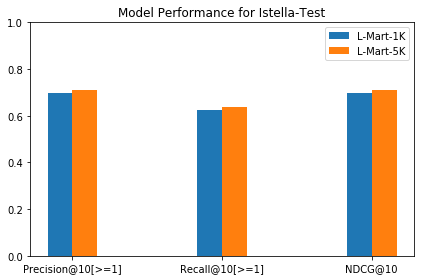

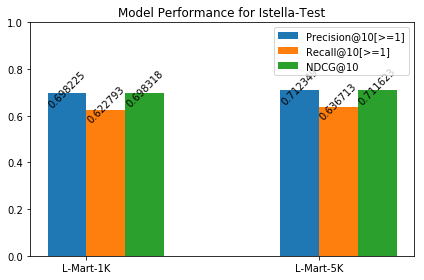

In [30]:
from rankeval.visualization.effectiveness import plot_model_performance

# MSN
#plot_model_performance(msn_model_perf, compare="models",  show_values=True)
#plot_model_performance(msn_model_perf, compare="metrics", show_values=True)

# Istella
plot_model_performance(istella_model_perf) 
plot_model_performance(istella_model_perf, compare="metrics", show_values=True) 


##  2. Tree-Wise Performance

- see title of this section =)
- Plot results

#### -> Computes tree-wise performance analysis

In [ ]:
from rankeval.analysis.effectiveness import tree_wise_performance

istella_tree_wise_perf = tree_wise_performance(datasets=[istella_test], 
                           models=[istella_lmart_1Ktrees], 
                           metrics=[precision_10, recall_10, ndcg_10],
                           step=10)
istella_tree_wise_perf.to_dataframe()

# compare train vs. test, discuss overfitting

istella_tree_wise_perf_train_vs_test = tree_wise_performance(datasets=[istella_train, istella_test], 
                           models=[istella_lmart_1Ktrees], 
                           metrics=[ndcg_10],
                           step=10)
istella_tree_wise_perf_train_vs_test.to_dataframe()


#msn_tree_wise_perf = tree_wise_performance(datasets=[msn_test], 
#                           models=[msn_mart_50, msn_lmart_100], 
#                           metrics=[precision_10, recall_10, ndcg_10],
#                           step=10)
#print msn_tree_wise_perf

#### test this later, some error when more datasets
#msn_valid_tree_wise_perf = tree_wise_performance(datasets=[msn_validation, msn_test], 
#                           models=[msn_mart_50], 
#                           metrics=[precision_10, recall_10, ndcg_10],
#                           step=10)
#print msn_valid_tree_wise_perf

#### -> Plot results

**plot_tree_wise_model_performance** takes as input:
    - the tree_wise_model_performance xarray (object) for given combinations of: dataset(s), model(s) and metric(s)
    - compare: str
        - the allowed values are: "models" and "metrics"
        - it allows the user to compare models or metrics
    

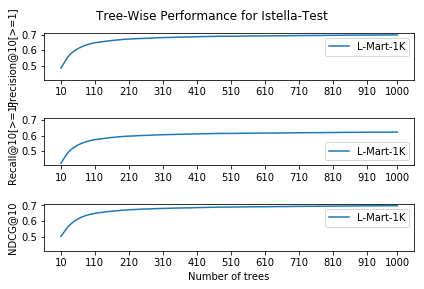

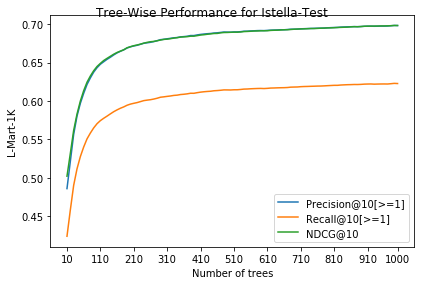

In [32]:
from rankeval.visualization.effectiveness import plot_tree_wise_model_performance

# single x axis
# fix x and y limits x-ticks start from 0
plot_tree_wise_model_performance(istella_tree_wise_perf, compare = "models")

# title instead of suptitle?
plot_tree_wise_model_performance(istella_tree_wise_perf, compare = "metrics")


#plot_tree_wise_model_performance(msn_tree_wise_perf, compare = "models") 
#plot_tree_wise_model_performance(msn_tree_wise_perf, compare = "metrics")

# TRY this later after fix from Salvo for multiple datasets
#plot_tree_wise_model_performance(msn_valid_tree_wise_perf, compare = "models")
#plot_tree_wise_model_performance(msn_valid_tree_wise_perf, compare = "datasets")

## 3. Tree-Wise Average Contribution

#### -> Computes tree average contribution analysis

In [ ]:
from rankeval.analysis.effectiveness import tree_wise_performance

istella_tree_contrib = tree_wise_average_contribution(datasets=[istella_test], 
                           models=[istella_lmart_500])
print istella_tree_contrib

msn_tree_contrib = tree_wise_average_contribution(datasets=[msn_test], 
                           models=[msn_mart_50, msn_lmart_100])
print msn_tree_contrib

#### -> Plot results

**plot_tree_wise_average_contribution** takes as input:
    - the tree_wise_average_contribution xarray (object) for given combinations of: dataset(s), model(s) and metric(s)

In [ ]:
from rankeval.visualization.effectiveness import plot_tree_wise_average_contribution

plot_tree_wise_average_contribution(istella_tree_contrib)
plot_tree_wise_average_contribution(msn_tree_contrib)

## 4. Query-Wise Performance

#### -> Computes query wise performance analysis

In [ ]:
from rankeval.analysis.effectiveness import query_wise_performance

msn_query_wise_perf = query_wise_performance(datasets=[msn_test], 
                            models=[msn_mart_50, msn_lmart_100], 
                            metrics=[precision_10, recall_10, ndcg_10],
                            bins=50)
print msn_query_wise_perf

#### -> Plot results

**plot_query_wise_performance** takes as input:
    - the query_wise_performance xarray (object) for given combinations of: dataset(s), model(s) and metric(s)
    - compare: str
        - the allowed values are: "models" and "metrics"
        - it allows the user to compare models or metrics

In [ ]:
from rankeval.visualization.effectiveness import plot_query_wise_performance

plot_query_wise_performance(msn_query_wise_perf, compare="models")
plot_query_wise_performance(msn_query_wise_perf, compare="metrics")

## 5. Document Graded Relevance

#### -> Computes document graded relevance analysis

In [ ]:
from rankeval.analysis.effectiveness import document_graded_relevance

istella_doc_graded_rel = document_graded_relevance(datasets=[istella_test], 
                               models=[istella_lmart_500], 
                               bins=50)
print istella_doc_graded_rel

msn_doc_graded_rel = document_graded_relevance(datasets=[msn_test], 
                                models=[msn_mart_50, msn_lmart_100],  
                                bins=50)
print msn_doc_graded_rel

#### -> Plot results

**plot_document_graded_relevance** takes as input:
    - the document_graded_relevance xarray (object) for given combinations of: dataset(s), model(s) and metric(s)

In [ ]:
from rankeval.visualization.effectiveness import plot_document_graded_relevance

plot_document_graded_relevance(istella_doc_graded_rel) 
plot_document_graded_relevance(msn_doc_graded_rel)

## 6. Rank-Confusion Matrix

#### -> Computes the rank confusion matrix analysis

In [ ]:
from rankeval.analysis.effectiveness import rank_confusion_matrix

istella_confusion_matrix = rank_confusion_matrix(datasets=[istella_test], 
                               models=[istella_lmart_500])
print istella_confusion_matrix

msn_confusion_matrix = rank_confusion_matrix(datasets=[msn_test], 
                                models=[msn_mart_50, msn_lmart_100])
print msn_confusion_matrix

#### -> Plot results

**plot_rank_confusion_matrix** takes as input:
    - the rank_confusion_matrix xarray (object) for given combinations of: dataset(s), model(s) and metric(s)

In [ ]:
from rankeval.visualization.effectiveness import plot_rank_confusion_matrix

plot_rank_confusion_matrix(df) 
plot_rank_confusion_matrix(df_msn) 

## 7. Query-Class Performance

#### -> Computes the query class performance analysis

In [ ]:
from rankeval.analysis.effectiveness import query_class_performance

classes = ['A', 'B', 'C', 'D', 'E']
query_classes = np.array([[classes[np.random.randint(len(classes))] 
                           for _ in range(istella.n_queries)]])

istella_query_class_perf = query_class_performance(datasets=[istella_test], 
                             models=[istella_lmart_500], 
                             metrics=[precision_10, recall_10, ndcg_10],
                             query_classes=query_classes)
print istella_query_class_perf

msn_query_class_perf = query_class_performance(datasets=[msn_test], 
                                 models=[msn_mart_50, msn_lmart_100],
                                 metrics=[precision_10, recall_10, ndcg_10],
                                 query_classes=query_classes)
print msn_query_class_perf


#### -> Plot results

**plot_query_class_performance** takes as input:
    - the query_class_performance xarray (object) for given combinations of: dataset(s), model(s) and metric(s)
    - compare: str
        - the allowed values are: "models" and "metrics"
        - it allows the user to compare models or metrics
    - show values: bool
        - shows the actual values on the plotted bars

In [ ]:
from rankeval.visualization.effectiveness import plot_query_class_performance

plot_query_class_performance(df, compare="metrics", show_values = True)
plot_query_class_performance(df, compare="models", show_values = True)